# Question 1 
# Noise Reduction

In [2]:
# Libraries and functions

import cv2
import numpy as np
import matplotlib.pyplot as plt


def normalize_picture(image):
    min_val = np.min(image)
    max_val = np.max(image)
    
    img_norm = (image - min_val) / (max_val - min_val)
    return img_norm

**A)** Read the image 'bridge.gif'. Filter the images using the masks of of 3x3, 5x5 and 7x7. How does the size of the mask affect blurring and noise reduction? Which do you think provides a better tradeoff between blurring and noise reduction for this image?

## Answer :
When the mask size increases, the blurring becomes stronger, the noise reduction improves, and more image details are lost.
I think the 3×3 mask provides a better trade-off, because the image does not contain much noise, and increasing the mask size leads to unnecessary blurring and loss of details.

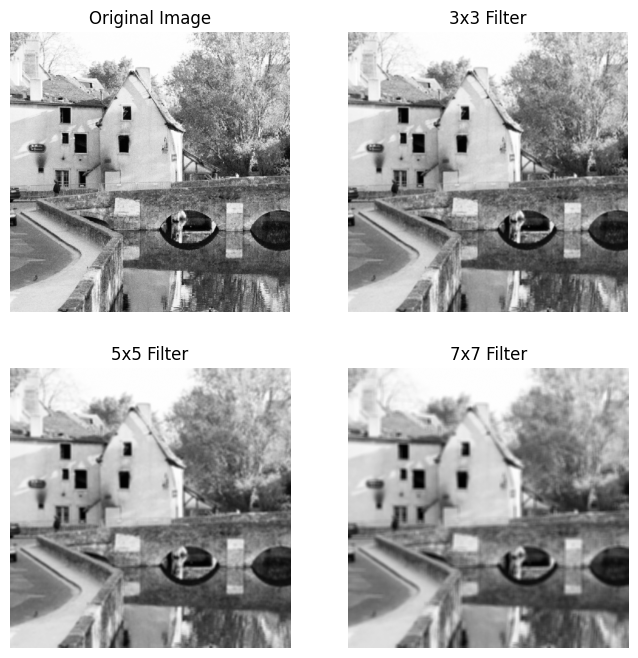

In [20]:
# Read the image
img1 = cv2.imread("bridge.gif", cv2.IMREAD_GRAYSCALE)

# filters
blur_3 = cv2.blur(img1, (3, 3))
blur_5 = cv2.blur(img1, (5, 5))
blur_7 = cv2.blur(img1, (7, 7))

# Show results
plt.figure(figsize=(8, 8))

plt.subplot(2, 2, 1)
plt.title("Original Image")
plt.imshow(img1, cmap="gray")
plt.axis("off")

plt.subplot(2, 2, 2)
plt.title("3x3 Filter")
plt.imshow(blur_3, cmap="gray")
plt.axis("off")

plt.subplot(2, 2, 3)
plt.title("5x5 Filter")
plt.imshow(blur_5, cmap="gray")
plt.axis("off")

plt.subplot(2, 2, 4)
plt.title("7x7 Filter")
plt.imshow(blur_7, cmap="gray")
plt.axis("off")

plt.show()


**B)** Sharpen the 3x3 blurred image by convolving with the Laplacian mask

\begin{bmatrix}
0 & -1 & 0 \\
-1 & 5 & -1 \\
0 & -1 & 0
\end{bmatrix}

Display and submit. Does this operation reduce the blurring? What about the original noise? You might need to rescale this image after convolving to make the effect more visible and to make the contrast more pleasing.

**Answer :**

Yes, sharpening with the Laplacian kernel reduces the blurring to some extent by enhancing edges and contrast, although it does not completely recover the original details lost during the blur.

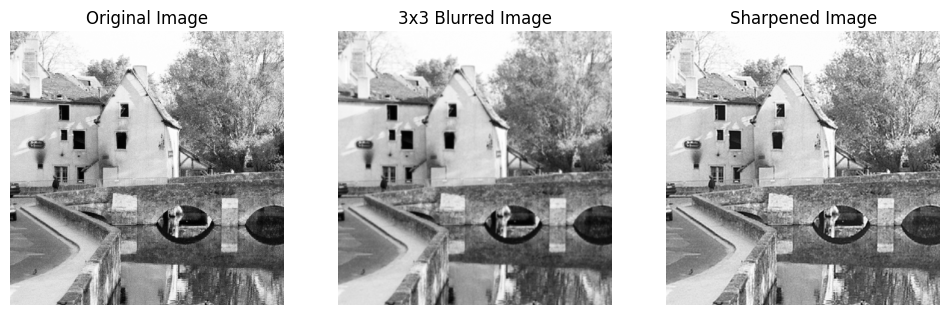

In [21]:
# Define Laplacian sharpening kernel
laplacian_kernel = np.array([[0, -1, 0],
                             [-1, 5, -1],
                             [0, -1, 0]], dtype=np.float32)

# Convolve blurred image with Laplacian kernel
sharpened = cv2.filter2D(blur_3, -1, laplacian_kernel)

# Display results
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.title("Original Image")
plt.imshow(img1, cmap="gray")
plt.axis("off")

plt.subplot(1, 3, 2)
plt.title("3x3 Blurred Image")
plt.imshow(blur_3, cmap="gray")
plt.axis("off")

plt.subplot(1, 3, 3)
plt.title("Sharpened Image")
plt.imshow(sharpened, cmap="gray")
plt.axis("off")

plt.show()


**C)** Apply a second sharpening step as in (B). Display and submit. Would repeated sharpening help image interpretation? Again, rescaling will be needed to see the effect.

**Answer :**

No. Repeating the Laplacian sharpening does not make the image more detailed. It only slightly enhances the edges and increase noise.

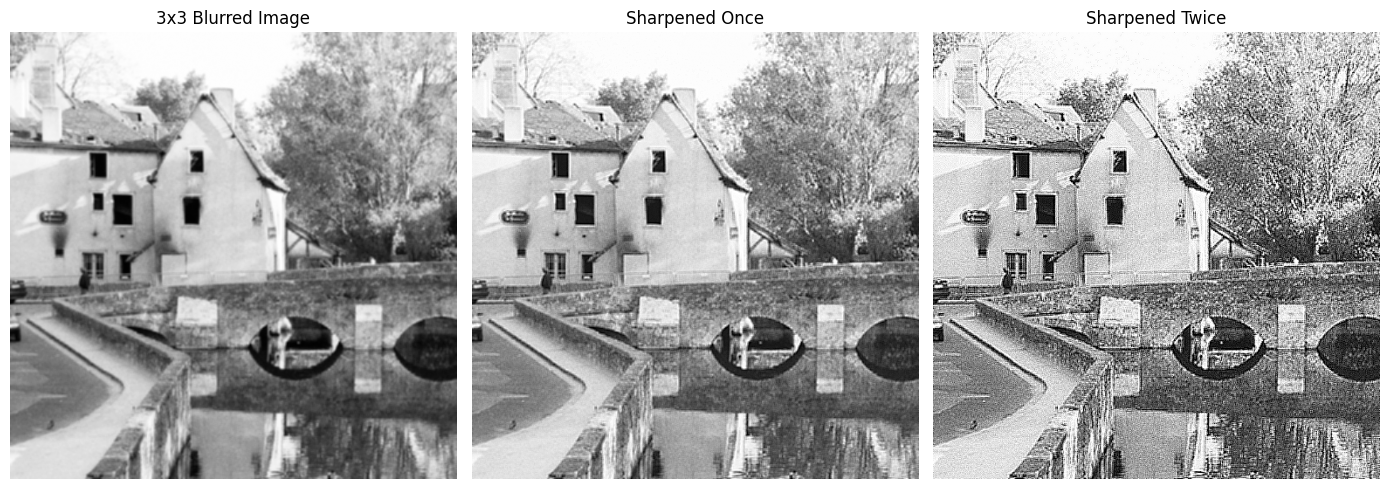

In [22]:

sharpened_2 = cv2.filter2D(sharpened, -1, laplacian_kernel)

plt.figure(figsize=(14, 6))

plt.subplot(1, 3, 1)
plt.title("3x3 Blurred Image")
plt.imshow(blur_3, cmap="gray")
plt.axis("off")

plt.subplot(1, 3, 2)
plt.title("Sharpened Once")
plt.imshow(sharpened, cmap="gray")
plt.axis("off")

plt.subplot(1, 3, 3)
plt.title("Sharpened Twice")
plt.imshow(sharpened_2, cmap="gray")
plt.axis("off")

plt.tight_layout()
plt.show()

## Question 2

Noise reduction is a crucial task to enhance the quality of images. You are provided with a noisy grayscale image, 'brain.png,' and your task is to apply noise reduction using two different methods: Median Filtering and Averaging Filtering.

**A)** Describe each of the two methods for noise reduction in images. Explain how they work and their key characteristics in addressing noise.

### **Median Filtering**

* For each pixel, it looks at a **neighborhood** around that pixel.
* The **median value** of all pixels in the neighborhood is calculated.
* The pixel is replaced with this median.

**Example:**

Suppose a 3×3 neighborhood contains **salt-and-pepper noise**:

\begin{bmatrix}
12 & 255 & 14 \\
10 & 0 & 11 \\
13 & 15 & 12
\end{bmatrix}


* Step 1: List all values: `[12, 255, 14, 10, 0, 11, 13, 15, 12]`
* Step 2: Sort the values: `[0, 10, 11, 12, 12, 13, 14, 15, 255]`
* Step 3: Take the median: **12**
* Step 4: Replace the center pixel (0) with 12

**Result:** Noise pixels (`0` and `255`) are removed, edges are preserved.

**Key characteristics:**

* Excellent for **salt-and-pepper noise**.
* Preserves edges well (does not blur them).
* Non-linear → robust to outliers in the neighborhood.


### **Averaging (Mean) Filtering**

* For each pixel, it calculates the **average of all pixels** in its neighborhood (mask/window).
* The pixel is replaced with this average.

**Example:**

Suppose a 3×3 neighborhood contains a noisy pixel:

\begin{bmatrix}
12 & 255 & 14 \\
10 & 0 & 11 \\
13 & 15 & 12
\end{bmatrix}

* Step 1: Sum all values: `12 + 255 + 14 + 10 + 0 + 11 + 13 + 15 + 12 = 342`
* Step 2: Compute the mean: `342 / 9 = 38`
* Step 3: Replace the center pixel (0) with 38

**Result:** Noise is reduced, but edges and details are **slightly blurred**.

**B)** Apply noise reduction to the 'brain.png' image using Averaging Filtering. Use different kernel sizes (e.g., 3x3, 5x5, ...) and determine which kernel size offers a better trade-off between blurring and noise reduction for this image.

**Answer :**

None of the averaging filters can remove and reduce the noise in `brain.png`, because the noise is of the salt-and-pepper type.

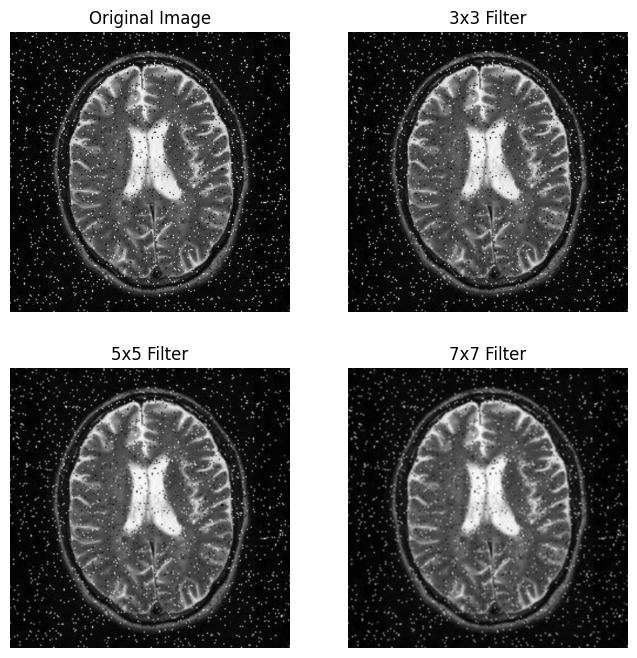

In [6]:
img2 = cv2.imread("brain.png", cv2.IMREAD_GRAYSCALE)

img2_norm = normalize_picture(img2)

# filters
blur_3 = cv2.blur(img2_norm, (3, 3))
blur_5 = cv2.blur(img2_norm, (5, 5))
blur_7 = cv2.blur(img2_norm, (7, 7))

# Show results
plt.figure(figsize=(8, 8))

plt.subplot(2, 2, 1)
plt.title("Original Image")
plt.imshow(img2, cmap="gray")
plt.axis("off")

plt.subplot(2, 2, 2)
plt.title("3x3 Filter")
plt.imshow(blur_3, cmap="gray")
plt.axis("off")

plt.subplot(2, 2, 3)
plt.title("5x5 Filter")
plt.imshow(blur_5, cmap="gray")
plt.axis("off")

plt.subplot(2, 2, 4)
plt.title("7x7 Filter")
plt.imshow(blur_7, cmap="gray")
plt.axis("off")

plt.show()

**C)** Apply noise reduction on the 'brain.png' image using Median Filtering. Use different kernel sizes (e.g., 3x3, 5x5, ...) and compare their results together in a single figure. Based on your observations, which kernel size do you think is better for noise reduction in this image?

**Answer :**
I think 11x11 median filter is better for noise reduction. It remove noise and still keep the image details.

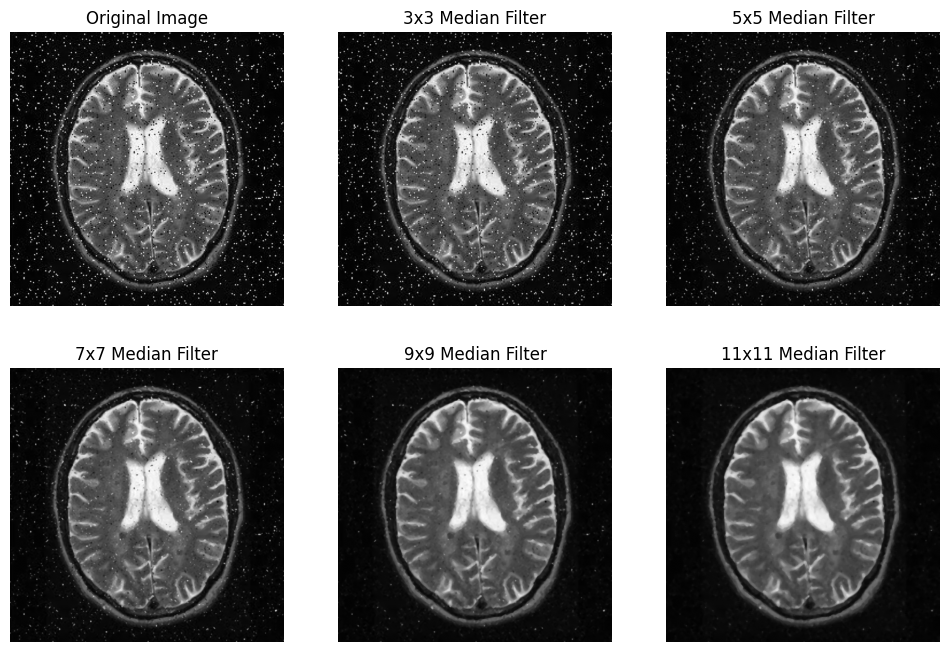

In [7]:
# filters
mblur_3 = cv2.medianBlur(img2, 3)
mblur_5 = cv2.medianBlur(img2, 5)
mblur_7 = cv2.medianBlur(img2, 7)
mblur_9 = cv2.medianBlur(img2, 9)
mblur_11 = cv2.medianBlur(img2, 11)

# Show results
plt.figure(figsize=(12, 8))

plt.subplot(2, 3, 1)
plt.title("Original Image")
plt.imshow(img2, cmap="gray")
plt.axis("off")

plt.subplot(2, 3, 2)
plt.title("3x3 Median Filter")
plt.imshow(mblur_3, cmap="gray")
plt.axis("off")

plt.subplot(2, 3, 3)
plt.title("5x5 Median Filter")
plt.imshow(mblur_5, cmap="gray")
plt.axis("off")

plt.subplot(2, 3, 4)
plt.title("7x7 Median Filter")
plt.imshow(mblur_7, cmap="gray")
plt.axis("off")

plt.subplot(2, 3, 5)
plt.title("9x9 Median Filter")
plt.imshow(mblur_9, cmap="gray")
plt.axis("off")

plt.subplot(2, 3, 6)
plt.title("11x11 Median Filter")
plt.imshow(mblur_11, cmap="gray")
plt.axis("off")

plt.show()

**D)** For each of the two methods, discuss their advantages and disadvantages in the context of noise reduction. Consider aspects such as noise removal effectiveness, preservation of image details.

**Answer :**
For salt-and-pepper noise, median filters perform much better and can remove the noise very effectively. For other types of noise, median filtering can still reduce noise, but its effect is generally weaker compared to filters designed for those noise models.

## Question 3

The Laplacian and Sobel operators are used for edge detection, the Laplacian operator focuses on second-order derivatives to identify rapid changes in intensity, while the Sobel operator is specifically designed for computing the gradient magnitude, emphasizing edges along the horizontal and vertical directions.

**A)** When would it be more advantageous to employ Sobel edge detection versus Laplacian edge detection in image processing applications?

**Answer :**
Sobel edge detection is more advantageous when the image is noisy, when you need the direction of edges, or when you want stable and smooth gradient-based edges. Since Sobel includes smoothing and computes first-order derivatives, it is more robust to noise and provides directional edge information, unlike the Laplacian, which is more sensitive to noise and lacks orientation data.

**B)** Open the image 'Edge.jpg,' apply the Sobel edge detector separately along the x and y dimensions, and then visualize the results for each dimension as well as the combined effect.

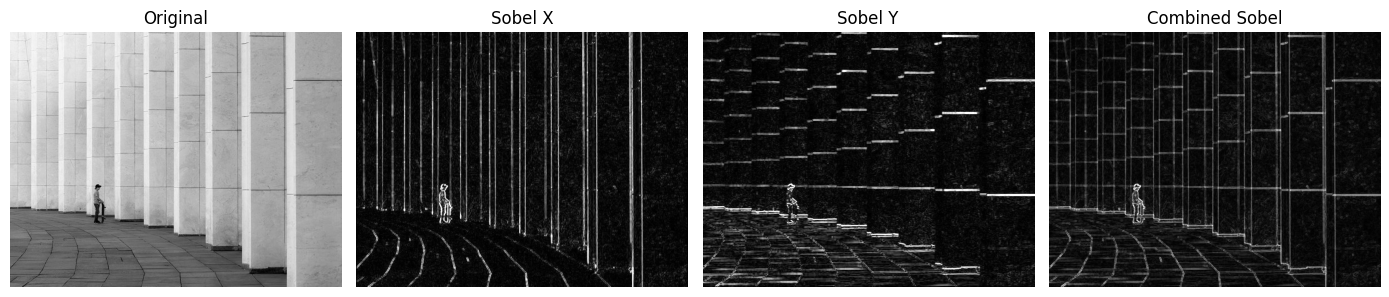

In [17]:
img = cv2.imread("Edge.jpg", cv2.IMREAD_GRAYSCALE)

# Apply Sobel filter along x and y
sobel_x = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=3)

# Convert to absolute (uint8)
sobel_x_abs = cv2.convertScaleAbs(sobel_x)
sobel_y_abs = cv2.convertScaleAbs(sobel_y)

# Combine both directions (gradient magnitude)
sobel_combined = cv2.addWeighted(sobel_x_abs, 0.5, sobel_y_abs, 0.5, 0)

# Display results
plt.figure(figsize=(14, 5))

plt.subplot(1, 4, 1)
plt.title("Original")
plt.imshow(img, cmap="gray")
plt.axis("off")

plt.subplot(1, 4, 2)
plt.title("Sobel X")
plt.imshow(sobel_x_abs, cmap="gray")
plt.axis("off")

plt.subplot(1, 4, 3)
plt.title("Sobel Y")
plt.imshow(sobel_y_abs, cmap="gray")
plt.axis("off")

plt.subplot(1, 4, 4)
plt.title("Combined Sobel")
plt.imshow(sobel_combined, cmap="gray")
plt.axis("off")

plt.tight_layout()
plt.show()

**C)** Open the image 'Edge.jpg,' apply the Laplacian edge detector, and display the results for Edge Detection and Magnitude.

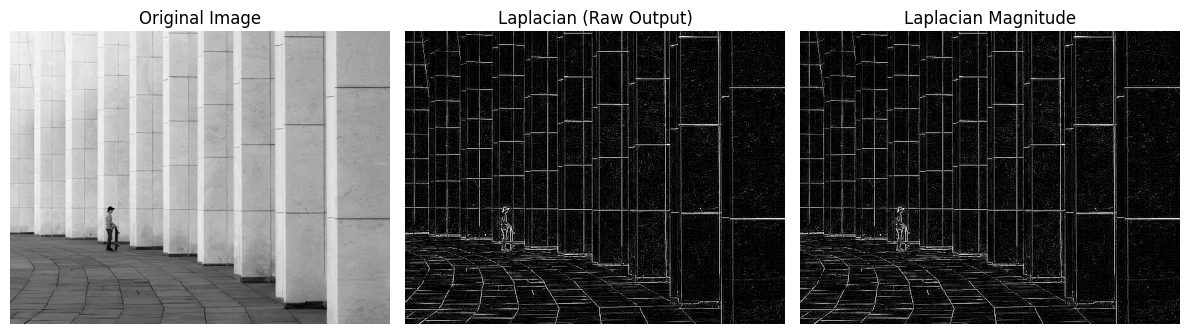

In [15]:
# Laplacian
lap = cv2.Laplacian(img, -1, ksize=3)

lap_mag = cv2.convertScaleAbs(lap)

plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.title("Original Image")
plt.imshow(img, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title("Laplacian (Raw Output)")
plt.imshow(abs(lap), cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title("Laplacian Magnitude")
plt.imshow(lap_mag, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()

**D)** Examine the results of these two methods and figure out which one works better for this task.

**Answer :**
In this task, the Sobel operator works better than the Laplacian operator for edge detection.
The original image contains noticeable noise, and this strongly affects the performance of the Laplacian method.

## Question 4

In this question, you will explore the Robert-Cross and Prewitt operators, compare their results, and then apply a high-boost filter to undo their effects. Use the image below for this question.

### **A)** Briefly explain how Roberts cross-gradient operator works and then apply it on the given image and display the result.


**Answer :**

The Roberts cross operator estimates the image gradient using two 2×2 kernels that respond to diagonal edges. The two kernels are usually:

$`G_x = \begin{bmatrix} +1 & 0 \\ 0 & -1 \end{bmatrix}`$

and

$`G_y = \begin{bmatrix} 0 & +1 \\ -1 & 0 \end{bmatrix}`$


You convolve the image with each kernel to get $`R_x`$ and $`R_y`$, then combine them to produce an edge strength map. Common combinations are the Euclidean magnitude $`\sqrt{R_x^2 + R_y^2}`$ or the simpler sum of absolute responses ($`|R_x| + |R_y|`$). Roberts is very local (2×2) so it detects fine diagonal edges but is also sensitive to noise.



### **B)** Briefly explain how Prewitt operator works and then apply it to the given image and display the result.


**Answer :**

The **Prewitt operator** is a gradient-based edge detector similar to Sobel but simpler.
It uses two **3×3 convolution kernels** to approximate the horizontal and vertical derivatives:

$`
G_x =
\begin{bmatrix}
-1 & 0 & +1 \\
-1 & 0 & +1 \\
-1 & 0 & +1
\end{bmatrix} `$

$`
G_y =
\begin{bmatrix}
+1 & +1 & +1 \\
0 & 0 & 0 \\
-1 & -1 & -1
\end{bmatrix}
`$

* $`G_x`$ detects **vertical edges**,
* $`G_y`$ detects **horizontal edges**.

After convolving the image with both kernels, you compute the gradient magnitude:

$`Magnitude = \sqrt{G_x^2 + G_y^2}`$



### **C)** Display the original image, the results of the Robert-Cross operator, and the results of the Prewitt operator side by side.

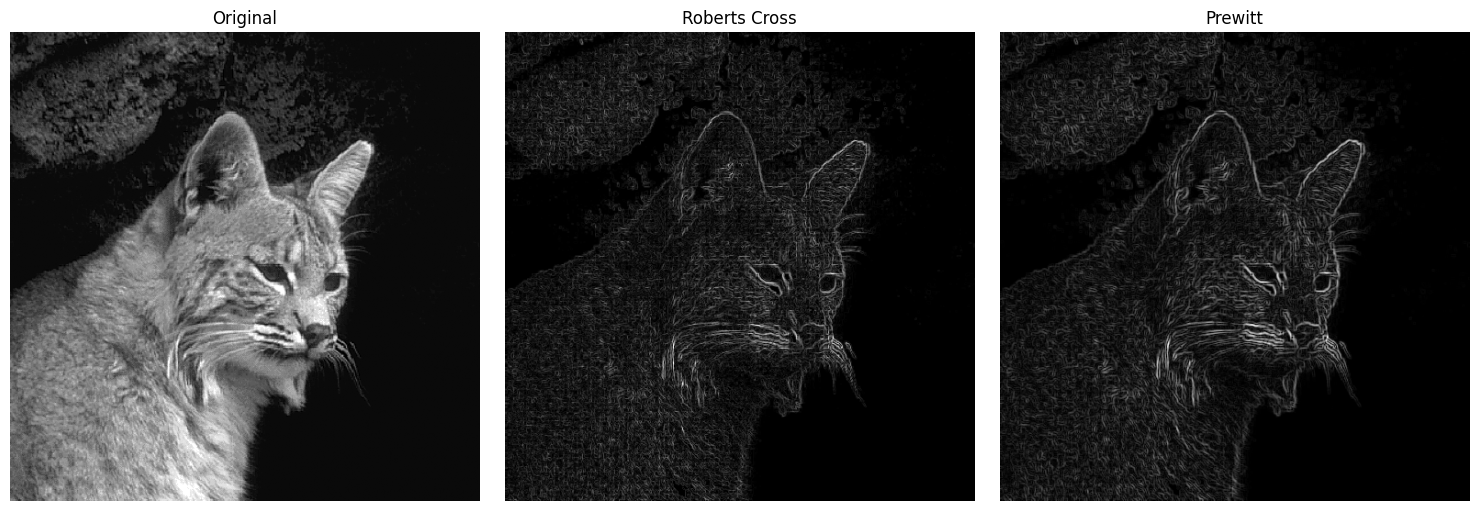

In [10]:
img4 = cv2.imread("cat.gif", cv2.IMREAD_GRAYSCALE)


# Roberts operatore
roberts_kx = np.array([[1, 0],
                       [0,-1]], dtype=np.float32)

roberts_ky = np.array([[0, 1],
                       [-1,0]], dtype=np.float32)

rx = cv2.filter2D(img4.astype(np.float32), -1, roberts_kx)
ry = cv2.filter2D(img4.astype(np.float32), -1, roberts_ky)

roberts_mag = np.sqrt(rx**2 + ry**2)
roberts_normal = normalize_picture(roberts_mag)


# Prewitt operator
prewitt_kx = np.array([[-1, 0, 1],
                       [-1, 0, 1],
                       [-1, 0, 1]], dtype=np.float32)

prewitt_ky = np.array([[1, 1, 1],
                       [0, 0, 0],
                       [-1,-1,-1]], dtype=np.float32)

gx = cv2.filter2D(img4.astype(np.float32), -1, prewitt_kx)
gy = cv2.filter2D(img4.astype(np.float32), -1, prewitt_ky)

prewitt_mag = np.sqrt(gx**2 + gy**2)
prewitt_normal = normalize_picture(prewitt_mag)


plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
plt.title("Original")
plt.imshow(img4, cmap='gray')
plt.axis("off")

plt.subplot(1,3,2)
plt.title("Roberts Cross")
plt.imshow(roberts_normal, cmap='gray')
plt.axis("off")

plt.subplot(1,3,3)
plt.title("Prewitt")
plt.imshow(prewitt_normal, cmap='gray')
plt.axis("off")

plt.tight_layout()
plt.show()


### **D)** Apply a high-boost filter to the images obtained after the Robert-Cross and Prewitt operators. Experiment with different values of 'A' and observe the changes.

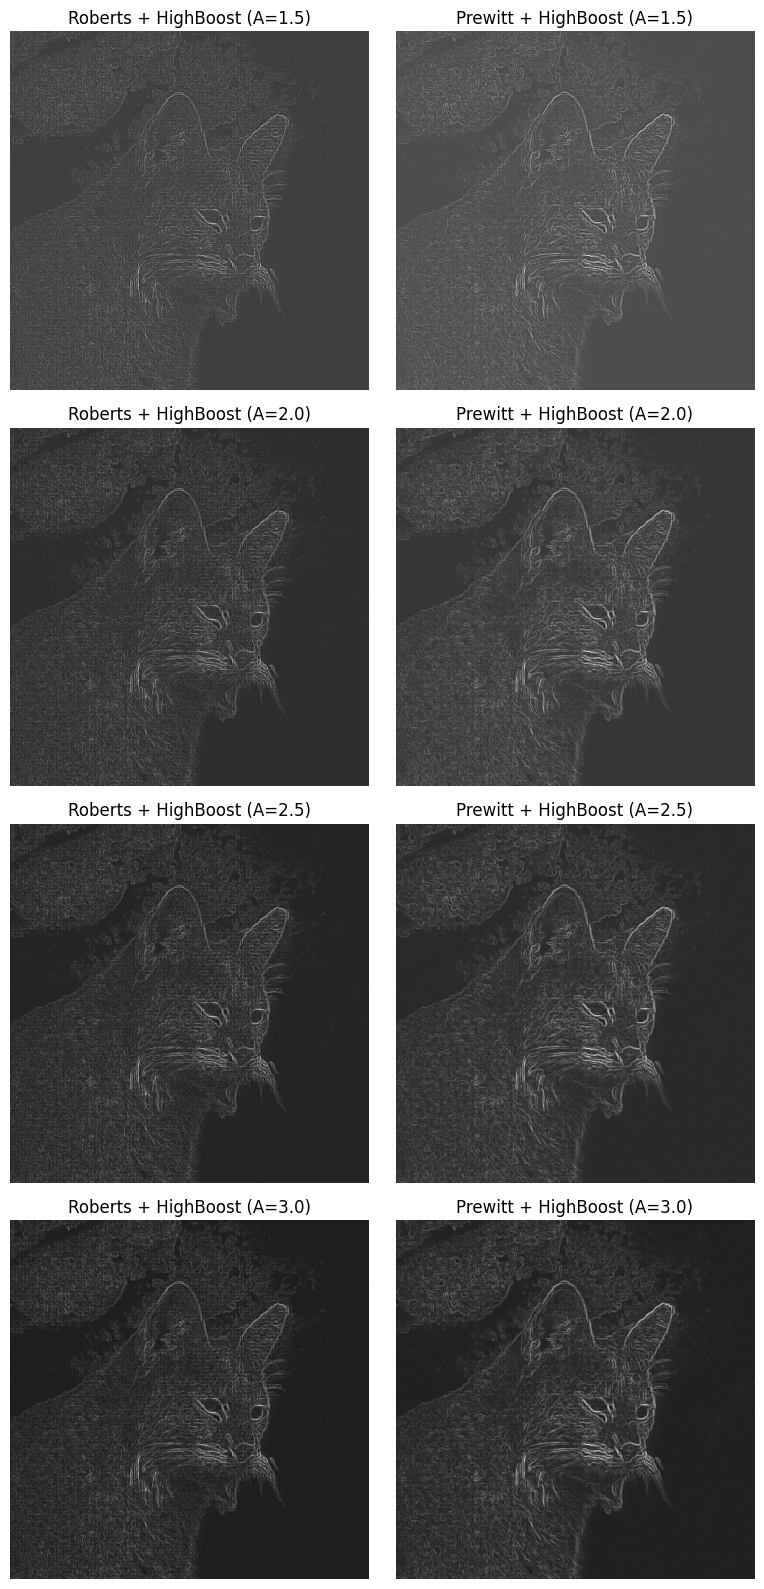

In [11]:
def high_boost(image, A=1.5):
    # Gaussian blur
    low = cv2.GaussianBlur(image, (5,5), 0)

    # High-boost formula
    hb = A * image.astype(np.float32) - low.astype(np.float32)

    hb_normal = normalize_picture(hb)
    return hb_normal

# Example A values
A_values = [1.5, 2.0, 2.5, 3.0]

plt.figure(figsize=(8,len(A_values) * 4))

plot_index = 1
for A in A_values:
    hb_roberts = high_boost(roberts_mag, A)
    hb_prewitt = high_boost(prewitt_mag, A)

    plt.subplot(len(A_values), 2, plot_index)
    plt.imshow(hb_roberts, cmap= "gray")
    plt.title(f"Roberts + HighBoost (A={A})")
    plt.axis('off')
    plot_index += 1

    plt.subplot(len(A_values), 2, plot_index)
    plt.imshow(hb_prewitt, cmap= "gray")
    plt.title(f"Prewitt + HighBoost (A={A})")
    plt.axis('off')
    plot_index += 1

plt.tight_layout()
plt.show()


### **E)** Write a brief discussion on the differences observed between the results of the Roberts cross-gradient and Prewitt operators. Explain how the high-boost filter affects the results of these operators and the significance of the chosen value of ‘A’.

**Answer :**

Applying a high-boost filter to the outputs changes them in different ways:

**Roberts + High-Boost**

* Since Roberts already produces a noisy result, high-boost:

  * Amplifies both edges *and* noise
  * Makes small pixel-level variations stronger
  * Can easily lead to an over-sharpened, “crackled” appearance
* Only small values of **A** are usable.

**Prewitt + High-Boost**

* Prewitt’s smoother result means:

  * High-boost enhances edges without strongly amplifying noise
  * Produces clearer, more continuous edges
  * Remains visually stable even for higher **A** values

Because Prewitt is less noisy, the high-boost filter improves it more effectively.


**3. Significance of the Chosen Value of A**

The value **A** controls the balance between:

* Retaining the original image
* Amplifying high-frequency components (edges)

**Effects of different A values**

* **A = 1.5**
  Pure high-pass → edge image only, no original content.

* **1.5 < A < 2.0**
  Light boost → edges get slightly sharper without introducing major noise.

* **2.5 ≤ A ≤ 3.0**
  Strong sharpening → good for Prewitt, risky for Roberts because noise is amplified.

*  When **A > 3.0** in a high-boost filter applied to an 8-bit image, most edge and high-frequency values become saturated (clipped at 0–255). As a result, increasing A further does not produce a noticeable visual change in the image, even though mathematically the high-pass component is being amplified.


## Question 5

To achieve successful image enhancement, it is often ineffective to rely on a single operation. Instead, a combination of techniques is utilized to attain the desired final result. Please open the image 'skeleton.png' and apply the enhancement methods you have already learned, incorporating spatial enhancement techniques.

**A)** Open the image 'skeleton.png,' apply your desired enhancement methods to achieve the best visibility of the bones. Explain your methods and why you chose them.

**B)** Compare the original image with your enhanced version in a single figure, illustrating them before and after enhancement.

<img src="skeleton.png" width="200" height="200"/>